In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization

# Data Preprocessing

In [13]:
from pandas.api.types import is_string_dtype

data = pd.read_csv('~/tf/german_credit_data.csv',index_col=0,sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
Meaning of the Values:

Age: Age of the person applying for the credit.
Sex: Gender of the person applying for the credit.
Job: 0,1,2,3 The values specified for the job in the form of 0,1,2,3.
Housing: own, rent or free.
Saving accounts: the amount of money in the person's bank account.
Checking account: cheque account.
Credit amount: Credit amount being requested.
Duration: Time given for credit payment.
Purpose: Goal of credit application.
Risk: Credit application positive or negative.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [16]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("lightgreen", as_cmap=True)
pd.crosstab(data[date_int[0]], data[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


/Users/wiecha/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/wiecha/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


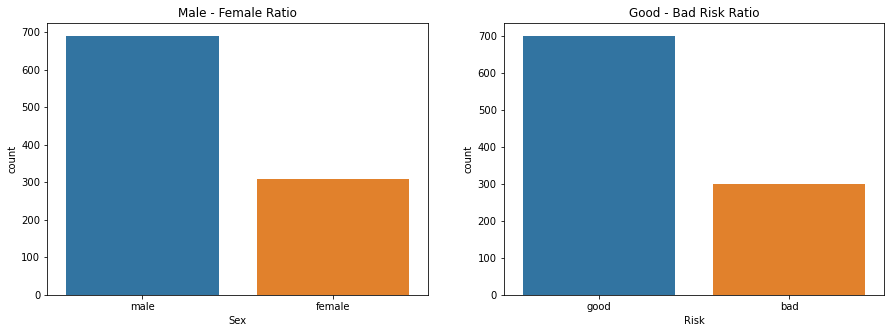

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data['Sex'], ax=ax[0]).set_title('Male - Female Ratio');
sns.countplot(data.Risk, ax=ax[1]).set_title('Good - Bad Risk Ratio');

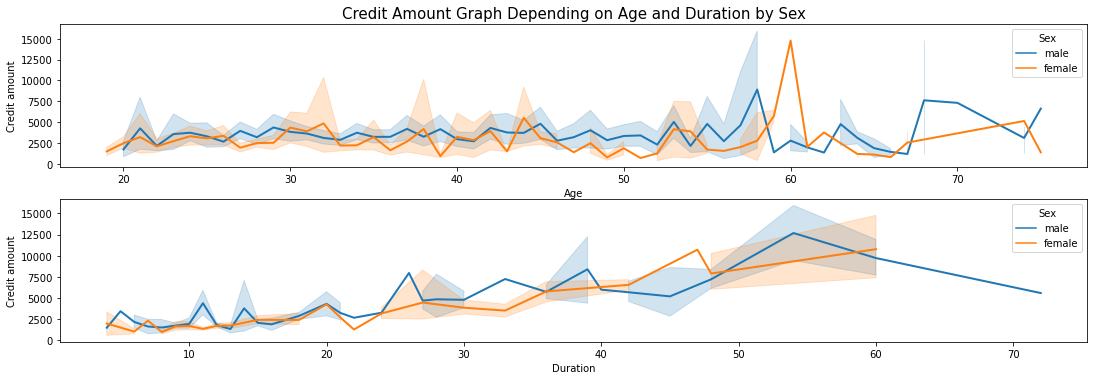

In [21]:
fig, ax = plt.subplots(2,1,figsize=(15,5))
plt.tight_layout()
sns.lineplot(data=data, x='Age', y='Credit amount', hue='Sex', lw=2, ax=ax[0]).set_title("Credit Amount Graph Depending on Age and Duration by Sex", fontsize=15);
sns.lineplot(data=data, x='Duration', y='Credit amount', hue='Sex', lw=2, ax=ax[1]);

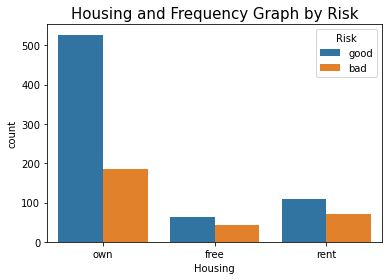

In [22]:
sns.countplot(x="Housing", hue="Risk", data=data).set_title("Housing and Frequency Graph by Risk", fontsize=15);
plt.show()

/var/folders/f6/lbyn8jfs7c18bbpdv0wbsvc80000gn/T/ipykernel_25049/1689183967.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


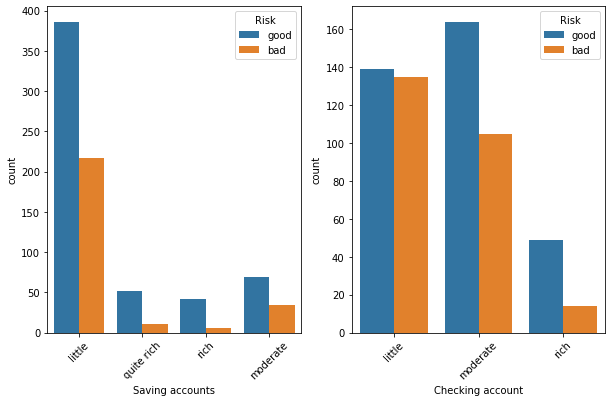

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
sns.countplot(x="Saving accounts", hue="Risk", data=data, ax=ax1);
sns.countplot(x="Checking account", hue="Risk", data=data, ax=ax2);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
fig.show()

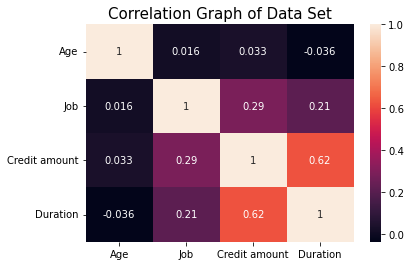

In [24]:
cor = data.corr()
sns.heatmap(cor, annot=True).set_title("Correlation Graph of Data Set",fontsize=15);
plt.show()

In [2]:
def normalize(df):
    result = df.copy()
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    return result

labels = data.columns
# lets go through column 2 column
for col in labels:
    if is_string_dtype(data[col]):
        if col == 'Risk':
            # we want 'Risk' to be a binary variable
            data[col] = pd.factorize(data[col])[0]
            continue
        # the other categorical columns should be one-hot encoded
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
        data.drop(col, axis=1, inplace=True)
    else:
        data[col] = normalize(data[col])

# move 'Risk' back to the end of the df
data = data[[c for c in data if c not in ['Risk']] + ['Risk']]

data_train = data.iloc[:800]
data_valid = data.iloc[800:]
x_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
x_val = data_valid.iloc[:,:-1]
y_val = data_valid.iloc[:,-1]

In [3]:
data.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,0.857143,0.666667,0.050567,0.029412,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.053571,0.666667,0.313690,0.647059,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.535714,0.333333,0.101574,0.117647,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.464286,0.666667,0.419941,0.558824,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.607143,0.666667,0.254209,0.294118,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Job                          1000 non-null   float64
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   float64
 4   Sex_female                   1000 non-null   uint8  
 5   Sex_male                     1000 non-null   uint8  
 6   Housing_free                 1000 non-null   uint8  
 7   Housing_own                  1000 non-null   uint8  
 8   Housing_rent                 1000 non-null   uint8  
 9   Saving accounts_little       1000 non-null   uint8  
 10  Saving accounts_moderate     1000 non-null   uint8  
 11  Saving accounts_quite rich   1000 non-null   uint8  
 12  Saving accounts_rich         1000 non-null   uint8  
 13  Checking account_li

# Model definition

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout
from pandas.api.types import is_string_dtype
from sklearn.metrics import confusion_matrix, precision_score
import seaborn as sns

sgd = optimizers.SGD(lr=0.03, decay=0, momentum=0.9, nesterov=False)

model = Sequential()
model.add(Dense(units=50, activation='tanh', input_dim=24, kernel_initializer='glorot_normal', bias_initializer='zeros'))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train.values, y_train.values, validation_data=(x_val.values, y_val.values), epochs=30, batch_size=128)

/Users/wiecha/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2021-12-29 11:49:18.048551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-29 11:49:18.049098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-29 11:49:18.127989: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Max
Epoch 1/30
1/7 [===>..........................] - ETA: 1s - loss: 0.9032 - accuracy: 0.2891

2021-12-29 11:49:18.274572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 28ms/step - loss: 0.7402 - accuracy: 0.4975 - val_loss: 0.6565 - val_accuracy: 0.6950
Epoch 2/30
7/7 [==============================] - 0s 8ms/step - loss: 0.6661 - accuracy: 0.6987 - val_loss: 0.6510 - val_accuracy: 0.6950
Epoch 3/30
7/7 [==============================] - 0s 8ms/step - loss: 0.6065 - accuracy: 0.6987 - val_loss: 0.5762 - val_accuracy: 0.7050
Epoch 4/30
1/7 [===>..........................] - ETA: 0s - loss: 0.5819 - accuracy: 0.6875

2021-12-29 11:49:18.572256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 8ms/step - loss: 0.5867 - accuracy: 0.6937 - val_loss: 0.5658 - val_accuracy: 0.7250
Epoch 5/30
7/7 [==============================] - 0s 7ms/step - loss: 0.5659 - accuracy: 0.7088 - val_loss: 0.5483 - val_accuracy: 0.7000
Epoch 6/30
7/7 [==============================] - 0s 7ms/step - loss: 0.5571 - accuracy: 0.7138 - val_loss: 0.5362 - val_accuracy: 0.7150
Epoch 7/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5475 - accuracy: 0.7350 - val_loss: 0.5273 - val_accuracy: 0.7350
Epoch 8/30
7/7 [==============================] - 0s 7ms/step - loss: 0.5379 - accuracy: 0.7312 - val_loss: 0.5230 - val_accuracy: 0.7300
Epoch 9/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5434 - accuracy: 0.7188 - val_loss: 0.5216 - val_accuracy: 0.7350
Epoch 10/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.7325 - val_loss: 0.5177 - val_accuracy: 0.7600
Epoch 11/30
7/7 [===========================

In [6]:
model.fit(x_train.values, y_train.values, validation_data=(x_val.values, y_val.values), epochs=30, batch_size=128)

Epoch 1/30
7/7 [==============================] - 0s 10ms/step - loss: 0.5198 - accuracy: 0.7475 - val_loss: 0.5160 - val_accuracy: 0.7500
Epoch 2/30
7/7 [==============================] - 0s 10ms/step - loss: 0.5140 - accuracy: 0.7487 - val_loss: 0.5171 - val_accuracy: 0.7500
Epoch 3/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5161 - accuracy: 0.7375 - val_loss: 0.5168 - val_accuracy: 0.7400
Epoch 4/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5118 - accuracy: 0.7512 - val_loss: 0.5159 - val_accuracy: 0.7300
Epoch 5/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5188 - accuracy: 0.7475 - val_loss: 0.5145 - val_accuracy: 0.7400
Epoch 6/30
7/7 [==============================] - 0s 7ms/step - loss: 0.5096 - accuracy: 0.7437 - val_loss: 0.5147 - val_accuracy: 0.7350
Epoch 7/30
7/7 [==============================] - 0s 7ms/step - loss: 0.5212 - accuracy: 0.7475 - val_loss: 0.5140 - val_accuracy: 0.7400
Epoch 8/30
7/7 [================

# Performance validation

In [9]:
y_pred = (model.predict( x_val.values ) > 0.5).astype("int32")

#sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='.5g')

print('Confusion matrix on validation data is {}'.format(confusion_matrix(y_val, y_pred)))
print('Precision Score on validation data is {}'.format(precision_score(y_val, y_pred, average='weighted')))


Confusion matrix on validation data is [[125  14]
 [ 36  25]]
Precision Score on validation data is 0.735109093804746


# Questions/discussion

### What observations do you have about the overall characteristics of the input data set (e.g. in terms of size, number and type of features, balance between different categories)?

#### Response in this field

### Can you suggest additional features (i.e. fields) that might be predictive of risk in lending, particularly in the African context?

#### Response in this field

### Interpret the confusion matrix in the KNN result above, e.g. write out in text form what each cell of the 2x2 matrix indicates

#### Response in this field

### What risks would a business using the model as currently trained be exposed to in terms of its prediction behavior?

#### Response in this field

### What would acceptable values for Precision and Recall for both class "0" (Good risk) and "1" (Bad risk) be in your view for a model to be usable in practice? Justify your choices as achieving perfect Precision and Recall simultaneously is not realistic.

#### Response in this field